In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             classification_report, confusion_matrix, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
data = pd.read_csv("Health_Wellbeing_PopN_Stats_MSOA_8158952824806288630.csv")

In [3]:
# Inspect the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Columns: 152 entries, FID to Shape__Length
dtypes: float64(75), int64(45), object(32)
memory usage: 7.9+ MB
None
               FID     MSOA_Km2        MSOA_Ha      All_Ages        N_0_3  \
count  6791.000000  6791.000000    6791.000000   6791.000000  6791.000000   
mean   3396.000000    19.206566    1920.415476   8288.464291   385.016198   
std    1960.537171    47.775545    4777.610296   1990.782971   157.654135   
min       1.000000     0.294414       0.000000   2224.000000    60.000000   
25%    1698.500000     1.687950     168.736000   6831.000000   274.000000   
50%    3396.000000     3.037760     303.772000   7985.000000   358.000000   
75%    5093.500000    10.545150    1053.815000   9319.500000   463.000000   
max    6791.000000  1128.070000  112807.000000  26513.000000  1580.000000   

            N_4_11      N_12_18       N_19_29      N_30_39      N_40_49  ...  \
count  6791.000000  6791.000000   6791.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FID              0
msoa11cd         0
msoa11nm         0
msoa11nmw        0
MSOA_Km2         0
                ..
ExW_Sc           0
InAct_Sc         0
TOT_SCORE        0
Shape__Area      0
Shape__Length    0
Length: 152, dtype: int64


In [5]:
# Inspect and preprocess data as before
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())


In [6]:
# Encoding categorical variables
categorical_features = data.select_dtypes(include=["object"]).columns
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col])


In [7]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [8]:
# Split the dataset into features (X) and target (y)
X = data.drop(columns=["OB_Perc"])  # Replace "OB_Perc" with the actual obesity percentage column name
y = data["OB_Perc"]

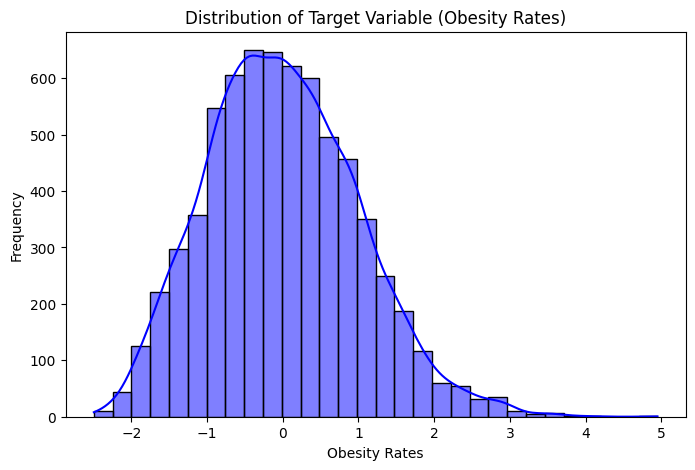

In [9]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable (Obesity Rates)")
plt.xlabel("Obesity Rates")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Calculate the minimum and maximum values of 'y'
min_val = data['OB_Perc'].min()
max_val = data['OB_Perc'].max()

# Define bins based on the calculated range using np.linspace
num_bins = 3  # Choose the desired number of bins
bins = np.linspace(min_val, max_val, num_bins + 1)

labels = ["Low", "Medium", "High"]

# Bin the target variable ensuring all values are included
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True, right=True)

# Splitting the data again for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_binned, test_size=0.3, random_state=42
)

In [20]:
# Neural Network Model for Regression
nn_regressor = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer for regression
])
nn_regressor.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mean_squared_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Train the neural network
nn_regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 164781.7031 - mean_squared_error: 164781.7031 - val_loss: 103.5374 - val_mean_squared_error: 103.5374
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 758.5139 - mean_squared_error: 758.5139 - val_loss: 35.0459 - val_mean_squared_error: 35.0459
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 314.9053 - mean_squared_error: 314.9053 - val_loss: 19.5995 - val_mean_squared_error: 19.5995
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150.2346 - mean_squared_error: 150.2346 - val_loss: 21.7188 - val_mean_squared_error: 21.7188
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.5441 - mean_squared_error: 100.5441 - val_loss: 9.4970 - val_mean_squared_error: 9.4970
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.3516 - mean_squared_error: 68.3516 - val_loss: 7.9755 - val_mean_squared_error: 7.9755
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.2891 - mean

In [22]:
# Evaluate the neural network
y_pred_nn = nn_regressor.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R2 Score: {r2_nn:.2f}")

Neural Network RMSE: 1.04
Neural Network R2 Score: -0.05


In [24]:
# Neural Network for Classification
y_train_clf_enc = to_categorical(LabelEncoder().fit_transform(y_train_clf))
y_test_clf_enc = to_categorical(LabelEncoder().fit_transform(y_test_clf))

nn_classifier = Sequential([
    Dense(64, input_dim=X_train_clf.shape[1], activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(len(labels), activation="softmax")  # Output layer for classification
])
nn_classifier.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Train the neural network
nn_classifier.fit(X_train_clf, y_train_clf_enc, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4777 - loss: 64.6957 - val_accuracy: 0.5331 - val_loss: 0.9137
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 0.9764 - val_accuracy: 0.5478 - val_loss: 0.7745
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5554 - loss: 0.7423 - val_accuracy: 0.5584 - val_loss: 0.7417
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5575 - loss: 0.7409 - val_accuracy: 0.5552 - val_loss: 0.7287
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5464 - loss: 0.7535 - val_accuracy: 0.5762 - val_loss: 0.7451
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5245 - loss: 0.7400 - val_accuracy: 0.5047 - val_loss: 0.7353
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5565 - loss: 0.7176 - val_accuracy: 0.5710 - val_loss: 0.7208
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5484 - loss: 0.7100 - val_accuracy: 0

In [26]:
# Evaluate the neural network
loss, accuracy = nn_classifier.evaluate(X_test_clf, y_test_clf_enc, verbose=0)
print(f"Neural Network Accuracy: {accuracy:.2f}")

Neural Network Accuracy: 0.58


In [28]:
# Regression Model: Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predictions
y_pred_reg = rf_regressor.predict(X_test)

In [30]:
# Evaluation Metrics for Regression
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

In [31]:
print("Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Regression Metrics:
MAE: 0.03
RMSE: 0.07
R2 Score: 1.00


In [32]:
# Feature Importance
feature_importance = rf_regressor.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

        Feature  Importance
99        OB_Sc    0.453111
88     OB_TotSc    0.420755
62   PopN18plus    0.055601
61   PopN17plus    0.052249
14     All_Ages    0.008554
..          ...         ...
139  StatisticC    0.000000
104       Age_R    0.000000
103       Sex_R    0.000000
102  IndicNameR    0.000000
56   DATA_TYPEC    0.000000

[151 rows x 2 columns]


In [33]:
# Define bins based on the observed range of y
bins = [-3, 0, 3, 5]  # Bins covering the range of y with proper intervals
labels = ["Low", "Medium", "High"]

# Bin the target variable
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Check if any NaN values remain
nan_count = y_binned.isnull().sum()
print(f"NaN values in y_binned after binning: {nan_count}")

# If NaN values exist, debug by identifying where they occur
if nan_count > 0:
    nan_indices = y_binned[y_binned.isnull()].index
    print("Values causing NaN:", y.iloc[nan_indices])

# Verify the distribution of categories
print("Category counts:")
print(y_binned.value_counts())


NaN values in y_binned after binning: 0
Category counts:
OB_Perc
Low       3544
Medium    3222
High        25
Name: count, dtype: int64


In [34]:
# Splitting the data again for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binned, test_size=0.3, random_state=42)

In [35]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [36]:
# Predictions
y_pred_clf = rf_classifier.predict(X_test_clf)

In [37]:
# Evaluation Metrics for Classification
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.62      0.77         8
         Low       0.97      0.97      0.97      1043
      Medium       0.96      0.97      0.97       987

    accuracy                           0.97      2038
   macro avg       0.98      0.85      0.90      2038
weighted avg       0.97      0.97      0.97      2038



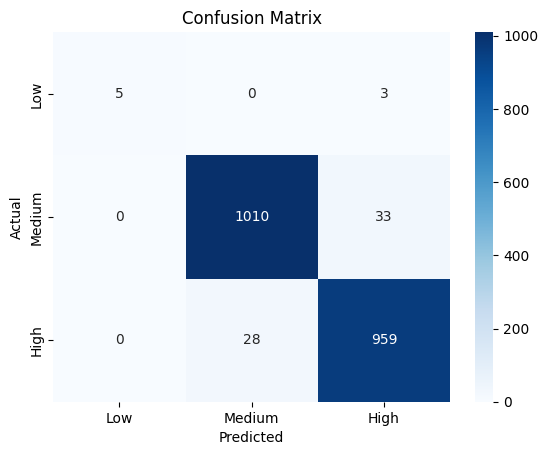

In [38]:
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


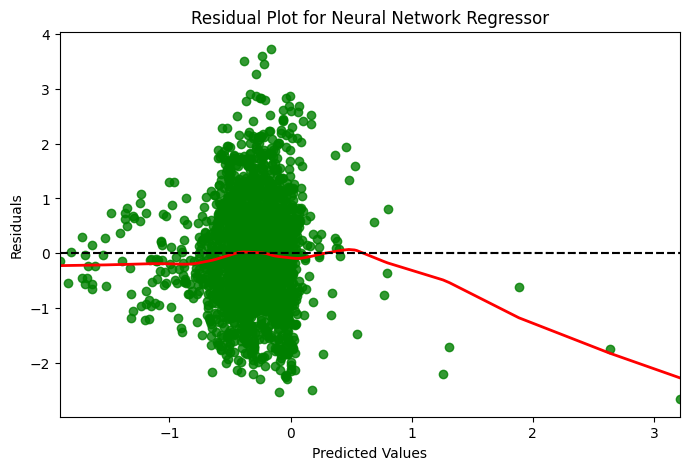

In [42]:
# Residual Plot for NN Regression
residuals_nn = y_test - y_pred_nn
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred_nn, y=residuals_nn, lowess=True, color="green", line_kws={"color": "red", "lw": 2})
plt.axhline(0, color="black", linestyle="--")
plt.title("Residual Plot for Neural Network Regressor")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Optimization: Hyperparameter Tuning (Grid Search)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Retrain and Evaluate Best Model
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Optimized RMSE: {rmse_best:.2f}")

Optimized RMSE: 0.07
